# **Face Mask Detection Using CNN**

In [26]:
import os
import cv2
import warnings
import numpy as np
import seaborn as sns
from PIL import Image
import matplotlib.image as imd
import matplotlib.pyplot as plt
from keras.models import load_model
warnings.filterwarnings('ignore')

# **Load Model**

In [4]:
model = load_model('model.h5')

In [21]:
def Prediction(image):
  image = Image.open(image)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  image = image/255.0
  image = np.expand_dims(image,axis=0)
  prediction = model.predict(image)
  return prediction

In [7]:
# import requests
# url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQKdcRCOADyB_FLkNZcPC0p_x0QOaoOApRJww&s'
# request = requests.get(url)
# with open('image.jpg','wb') as file:
#   file.write(request.content)
# # plt.imshow(imd.imread('image.jpg'))

In [31]:
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Error: Unable to open camera.")

while True:
    path = 'capture.jpg'
    ret, frame = cap.read()
    if ret:
        if os.path.exists(path):
            os.remove(path)
    cv2.imshow('Camera', frame)
    if cv2.waitKey(2) == 27:
        out = cv2.imwrite(path, frame)
        break
cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[[0.0669408]]
Not Mask Image


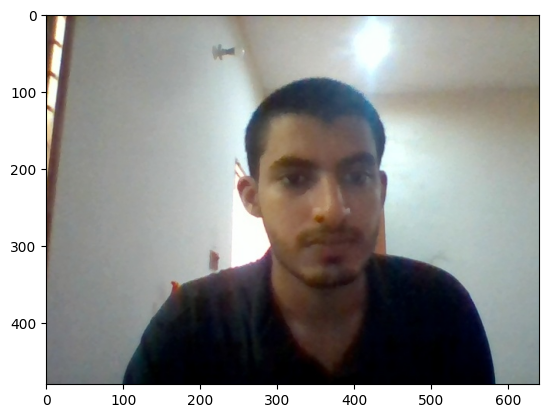

In [28]:
def predict(image):
    x = Prediction(image)
    if x > 0.5:
        print(x)
        print('Mask Image')
    else:
        print(x)
        print('Not Mask Image')
          
predict('capture.jpg')
plt.imshow(imd.imread('capture.jpg'))
